Imports section

In [15]:
import plotly.express as px
import pandas as pd
import seaborn as sns

Create header column and read wine data set.

In [4]:
#header string
headers =( "Wine Number,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,"
            +"Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,"
            +"Color intensity,Hue,OD280/OD315 of diluted wines,Proline")
hlist = headers.split(sep:= ',')

#validate we have the text values and right column header count
print(hlist)
len(hlist)

['Wine Number', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


14

Read in our data!

In [6]:
#using relative path for flexibilities sake so KEEP this file in the same folder. 
df=pd.read_csv(r'../wine_analysis/wine.data',names=hlist)
df.head()


,Wine Number,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Tidy our Data

In [10]:
#fix headers to be sql compliant
df.columns = df.columns.str.lower().str.strip().str.replace('/','_').str.replace(' ','_')

In [11]:
#Look for null values
df.isna().sum()


wine_number                     0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280_od315_of_diluted_wines    0
proline                         0
dtype: int64

In [12]:
#0 nulls very clean, but let's check for data types
df.info()
#data types look VERY clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wine_number                   178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280_od315_of_diluted_wines  178 non-null    float64
 13  proli

Basic exploration of data distribution

In [14]:
#all distributions
for col in df.keys():
    if df[col].dtype !='O':
        display(px.histogram(x=df[col],labels={'x':col}))


Let us check how wine_number looks as a target.

c:\Users\Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



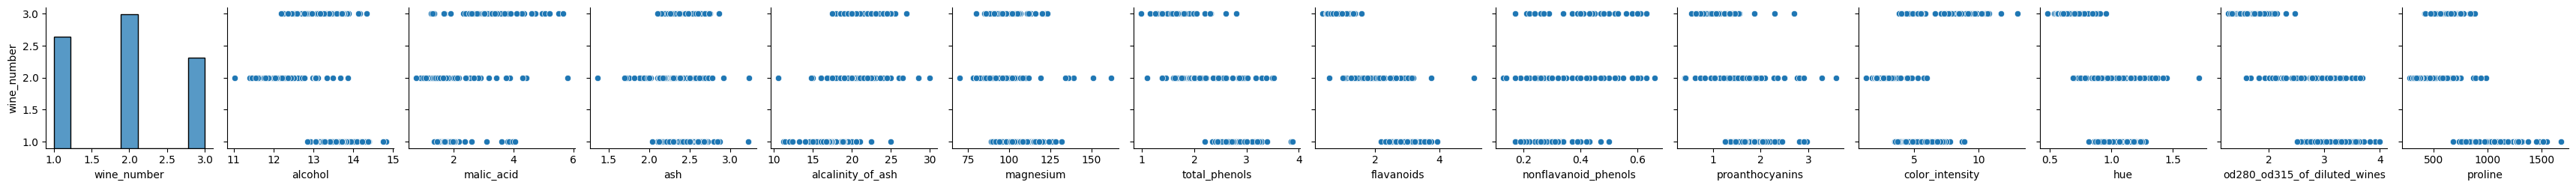

In [16]:
#looks like a random forest to find the answer
sns.pairplot(df, y_vars=['wine_number'])


c:\Users\Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



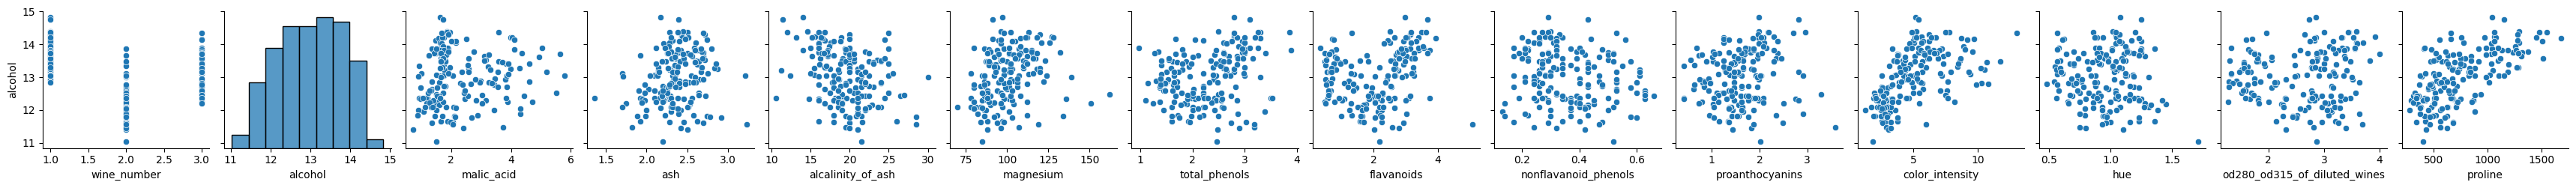

In [17]:

sns.pairplot(df, y_vars=['alcohol'])